In [58]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("incident_event_log.csv")
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [60]:
# !pip install seaborn

<IPython.core.display.Javascript object>


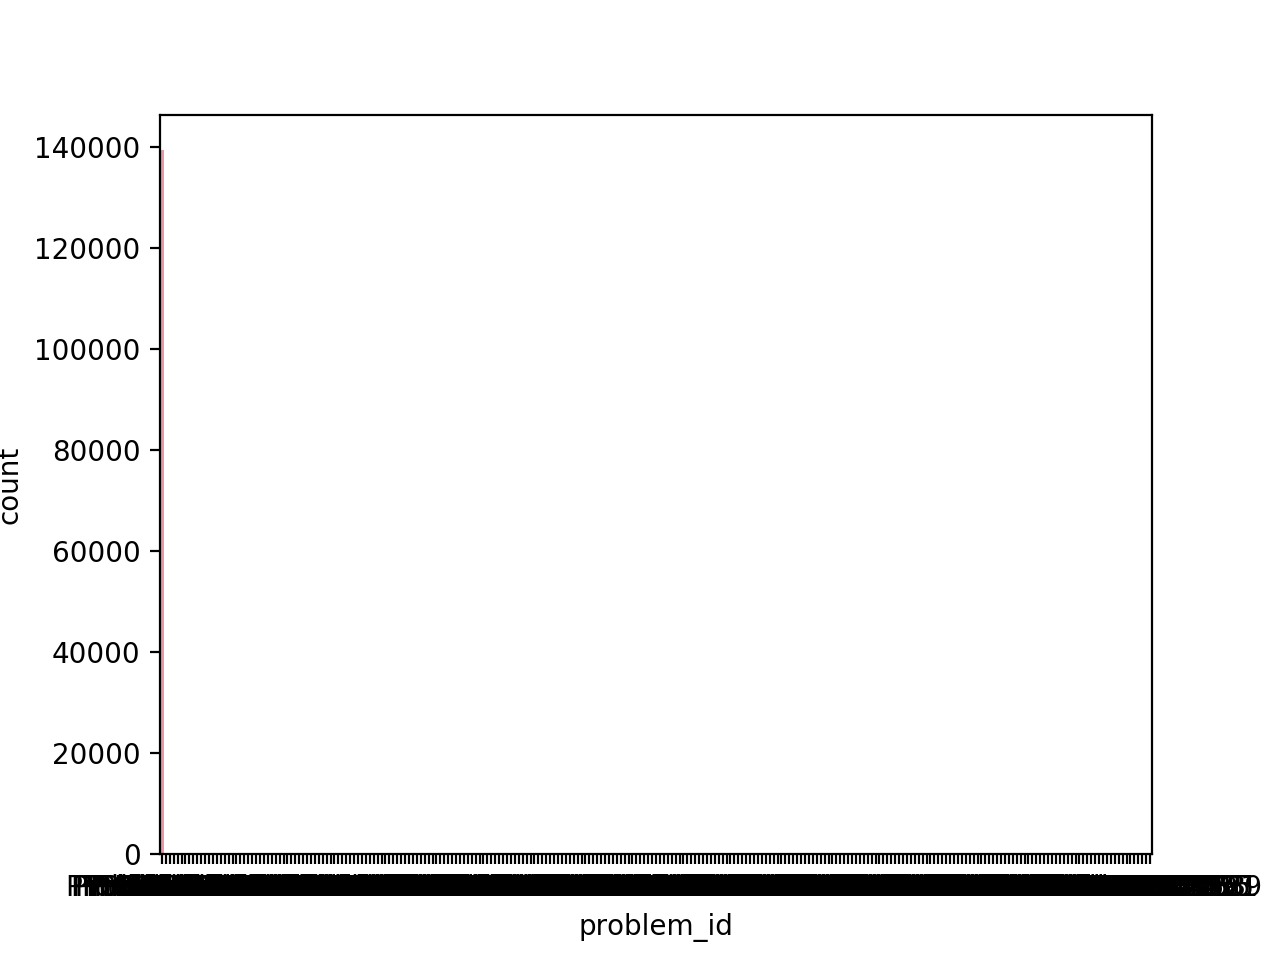

In [61]:
sns.countplot(x = 'problem_id', data = dataset)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


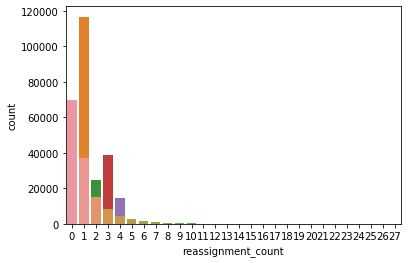

In [53]:
column = [columns for columns in dataset]
for i in range(1,4):
    print(sns.countplot(x = str(column[i]), data = dataset))

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [63]:
dataset.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [64]:
'''df2 = dataset.replace("unknown",np.nan)
df2.head()'''

'df2 = dataset.replace("unknown",np.nan)\ndf2.head()'

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [66]:
dataset = dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"],axis = 1)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [68]:
active = dataset["active"].tolist()

In [69]:
active_dic = sum_of_catogery(active)
active_dic

defaultdict(int, {True: 116726, False: 24986})

In [70]:
# define a function, try to find the catogery and its number of each column
from collections import defaultdict

def column_to_list(dataset,name_of_list):
    alist = dataset[name_of_list].tolist()
    return alist

def sum_of_catogery(catogery_list):
    dic = defaultdict(int)
    for a in catogery_list:
        dic[a] += 1
    
    return dic

def df_to_ddic(dataset,column_name):
    a = column_to_list(dataset,column_name)
    dic = sum_of_catogery(a)
    
    return dic

In [71]:
# sort the dictionary by key
def sort_by_key(dd):
    d = dict(dd)
    d = sorted(d.items(), key = lambda item:item[0])

    return d

In [72]:
incident_state_dic = df_to_ddic(dataset, "incident_state")
incident_state_dic

defaultdict(int,
            {'New': 36407,
             'Resolved': 25751,
             'Closed': 24985,
             'Active': 38716,
             'Awaiting User Info': 14642,
             'Awaiting Problem': 461,
             'Awaiting Vendor': 707,
             'Awaiting Evidence': 38,
             '-100': 5})

In [73]:
made_sla_dic = df_to_ddic(dataset,"made_sla")
made_sla_dic, len(made_sla_dic)

(defaultdict(int, {True: 132497, False: 9215}), 2)

In [74]:
contact_type_dic = df_to_ddic(dataset,"contact_type")
contact_type_dic, len(contact_type_dic)

(defaultdict(int,
             {'Phone': 140462,
              'Email': 220,
              'Self service': 995,
              'Direct opening': 17,
              'IVR': 18}),
 5)

In [79]:
caller_id_ddic = df_to_ddic(dataset,"caller_id")
caller_id_ddic
sns.countplot(dataset["caller_id"])

In [80]:
'''problem_id_ddic = df_to_ddic(dataset,"problem_id")
problem_id_ddic'''

'problem_id_ddic = df_to_ddic(dataset,"problem_id")\nproblem_id_ddic'

In [ ]:
column = [columns for columns in dataset]
for i in range(1,len(column)):
    print(len(df_to_ddic(dataset, str(column[i]))))

In [17]:
impact_dict = df_to_ddic(dataset, "impact")
impact_dict

defaultdict(int, {'2 - Medium': 134335, '1 - High': 3491, '3 - Low': 3886})

In [18]:
urgency_dict = df_to_ddic(dataset, "urgency")
urgency_dict

defaultdict(int, {'2 - Medium': 134094, '3 - Low': 3598, '1 - High': 4020})

In [19]:
priority_dict = df_to_ddic(dataset, "priority")
priority_dict

defaultdict(int,
            {'3 - Moderate': 132452,
             '2 - High': 2972,
             '4 - Low': 4030,
             '1 - Critical': 2258})

In [20]:
notify_dict = df_to_ddic(dataset, "notify")
notify_dict

defaultdict(int, {'Do Not Notify': 141593, 'Send Email': 119})

In [81]:
resolved_at_dic = df_to_ddic(dataset, "resolved_at")
r = dict(resolved_at_dic)
r["?"]
# how many "?" values considered as NA does "resolved_at" column have?

3141

In [ ]:
import numpy as np
dataset = dataset.replace("?",np.nan)

In [163]:
closed_at_ddic = df_to_ddic(dataset,"closed_at")

# Dose "closed_at" column have "?" value?
c = dict(closed_at_ddic)
if "?" in c.keys():
    print("True")
else: 
    print("False")

False


## plot the "resolved_at" and "closed_at", try to find the relation between them

In [82]:
# delete the "?" value of "resolved_at" column in dataframe and plot it with "closed_at" column
df2=dataset[~dataset['resolved_at'].isin(["?"])]
len(df2)

138571

In [83]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

False


In [84]:
len(df2)

138571

## Change date and time to timestamps.

In [89]:
import time, datetime
from datetime import datetime

def time2stamp(cmnt_time):   #转时间戳函数
    cmnt_time=datetime.strptime(cmnt_time,'%d/%m/%Y %H:%M')
    stamp=int(datetime.timestamp(cmnt_time))
    return stamp

In [91]:
df2["resolved_at"]

0         29/2/2016 11:29
1         29/2/2016 11:29
2         29/2/2016 11:29
3         29/2/2016 11:29
4          1/3/2016 09:52
5          1/3/2016 09:52
6          1/3/2016 09:52
7          1/3/2016 09:52
8          1/3/2016 09:52
9          1/3/2016 09:52
10         1/3/2016 09:52
11         1/3/2016 09:52
12         1/3/2016 09:52
13         1/3/2016 02:55
14         1/3/2016 02:55
15         1/3/2016 02:55
16         1/3/2016 02:55
17         1/3/2016 02:55
18         1/3/2016 02:55
19         1/3/2016 02:55
20         2/3/2016 12:06
21         2/3/2016 12:06
22         2/3/2016 12:06
23         2/3/2016 12:06
24        29/2/2016 15:51
25        29/2/2016 15:51
26        29/2/2016 15:51
27        29/2/2016 15:51
28        29/2/2016 15:51
29        29/2/2016 15:51
               ...       
141658    10/2/2017 13:57
141659    10/2/2017 13:57
141660    10/2/2017 17:27
141661    10/2/2017 17:27
141662    10/2/2017 17:27
141663    10/2/2017 17:27
141664    10/2/2017 14:52
141665    10

In [92]:
df2["resolved_at"] = df2["resolved_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df2["closed_at"] = df2["closed_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df2["opened_at"] = df2["opened_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
sys_created_at_dic = df_to_ddic(dataset, "sys_created_at")
s = dict(sys_created_at_dic)
s["?"]

53076

In [99]:
sys_updated_at_dic = df_to_ddic(dataset, "sys_updated_at")
#print(sys_updated_at_dic)
s2 = dict(sys_updated_at_dic)
s2["?"]

KeyError: '?'

In [ ]:
resolved_at_dict2 = df_to_ddic(df2,"resolved_at")
r2 = dict(resolved_at_dict2)
if "?" in r2.keys():
    print("True")
else: 
    print("False")

In [100]:
df2["sys_updated_at"] = df2["sys_updated_at"].apply(time2stamp)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


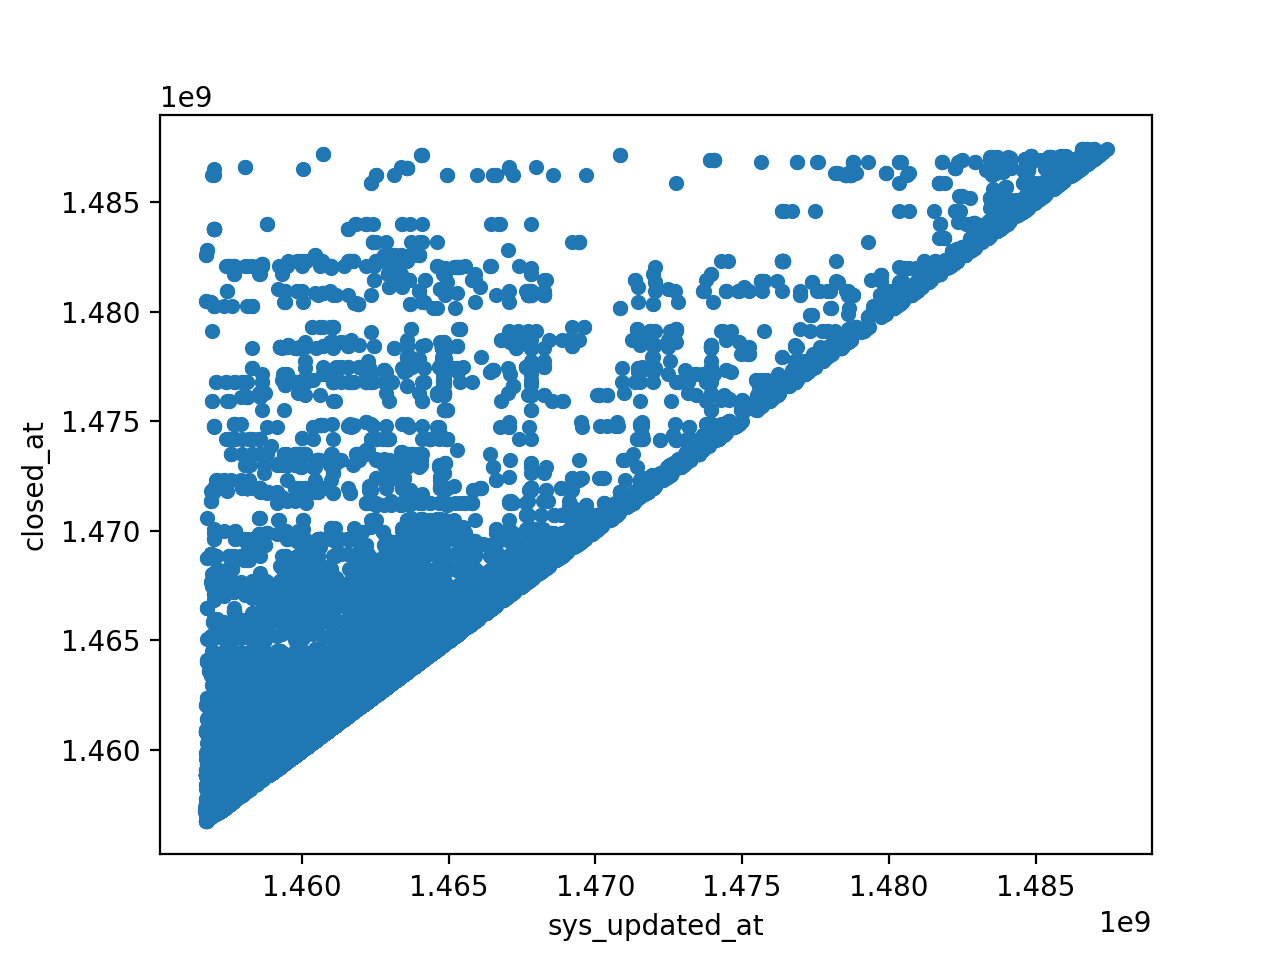

In [102]:
df2.plot.scatter(x="sys_updated_at",y="closed_at")

In [ ]:
# Obviously, those two column is a linear regression, so when choosing the target, "closed_at" 
# column is better as it doesn't have "?" value.

In [103]:
# 删除空值很多的列
df3 = df2.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

KeyError: "['problem_id' 'cmdb_ci' 'rfc' 'vendor' 'caused_by'] not found in axis"

In [92]:
df3.dtypes

number                     category
incident_state               object
active                         bool
reassignment_count            int64
reopen_count                  int64
sys_mod_count                 int64
made_sla                       bool
caller_id                    object
opened_by                    object
opened_at                     int64
sys_created_by               object
sys_created_at               object
sys_updated_by               object
sys_updated_at               object
contact_type                 object
location                     object
category                     object
subcategory                  object
u_symptom                    object
impact                       object
urgency                      object
priority                     object
assignment_group             object
assigned_to                  object
knowledge                      bool
u_priority_confirmation        bool
notify                       object
closed_code                 

In [117]:
df3.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


In [118]:
df3.dtypes

number                     category
incident_state               object
active                         bool
reassignment_count            int64
reopen_count                  int64
sys_mod_count                 int64
made_sla                       bool
caller_id                    object
opened_by                    object
opened_at                     int64
sys_created_by               object
sys_created_at               object
sys_updated_by               object
sys_updated_at               object
contact_type                 object
location                     object
category                     object
subcategory                  object
u_symptom                    object
impact                       object
urgency                      object
priority                     object
assignment_group             object
assigned_to                  object
knowledge                      bool
u_priority_confirmation        bool
notify                       object
closed_code                 

In [87]:
df3["number"] = pd.to_numeric(df3["number"])

ValueError: Unable to parse string "INC0000045" at position 0

In [151]:
df4 = df.drop(["problem_id","cmdb_ci","rfc","vendor","caused_by"],axis = 1)

In [152]:
df4.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,Created by 6,...,3 - Moderate,Group 56,unknown,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,Created by 171,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,537600


In [97]:
df4["resolved_at"] = df4["resolved_at"].apply(time2stamp)

In [176]:
df5 = df4.drop(["resolved_at"],axis = 1)

In [99]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 30 columns):
number                     141712 non-null category
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null object
u_symptom                  141712 non-null o

In [ ]:
for i in range(len(df4)):
    

In [ ]:
df4[1]

In [62]:
dataset["rest_time"] = dataset.apply(lambda x: x['closed_at'] -  x['opened_at'], axis=1)

In [104]:
df2["rest_time2"] = df2.apply(lambda x: x["closed_at"] - x["sys_updated_at"], axis=1)

/Users/chenshuyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,1457175600,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,1457254800,536580


In [63]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,rest_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,unknown,unknown,unknown,unknown,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


In [106]:
df = df2.drop(["sys_updated_at","closed_at"],axis = 1)

In [107]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time2
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,470220
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,443220
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,433860
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,536580


## 把所有的列都改成label encoder

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
def convert(data,column):
    number = LabelEncoder()
    data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

In [110]:
convert(df,"number")

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time2
0,0,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,470220
1,0,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,443220
2,0,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,433860
3,0,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,3 - Moderate,Group 56,?,True,False,Do Not Notify,code 5,Resolved by 149,1456741740,0
4,1,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,536580
5,1,Active,True,1,0,1,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,534600
6,1,Active,True,1,0,2,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,534420
7,1,Active,True,1,0,3,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,512940
8,1,Active,True,1,0,4,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,512880
9,1,Active,True,1,0,5,True,Caller 2403,Opened by 397,1456717200,...,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,1456822320,434760


In [112]:
column = [columns for columns in df]
for i in range(0,len(column)):
    if df[str(column[i])].dtypes == "O":
        convert(df,str(column[i]))
    elif df[str(column[i])].dtypes == "bool":
        convert(df,str(column[i]))

In [113]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time2
0,0,7,1,0,0,0,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,470220
1,0,8,1,0,0,2,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,443220
2,0,8,1,0,0,3,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,433860
3,0,6,0,0,0,4,1,1412,200,1456704960,...,2,48,0,1,0,0,13,52,1456741740,0
4,1,7,1,0,0,0,1,1412,121,1456717200,...,2,64,224,1,0,0,13,197,1456822320,536580


In [115]:
df["incident_state"].dtypes

dtype('int64')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,rest_time
0,0,7,1,0,0,0,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
1,0,8,1,0,0,2,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
2,0,8,1,0,0,3,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
3,0,6,0,0,0,4,1,1462,200,151,...,2,47,234,1,0,0,12,51,12244,470640
4,1,7,1,0,0,0,1,1462,120,58,...,2,63,223,1,0,0,12,196,40,537600
5,1,1,1,1,0,1,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
6,1,1,1,1,0,2,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
7,1,1,1,1,0,3,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
8,1,1,1,1,0,4,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600
9,1,1,1,1,0,5,1,1462,120,58,...,2,15,167,1,0,0,12,196,40,537600


In [116]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9214779349037662

In [117]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 30,
                  "max_features"  :  29,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9642087062798318

In [169]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'red')

<IPython.core.display.Javascript object>

ValueError: x and y must be the same size

In [119]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import AdaBoostRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = { "loss" : "square",
                    "n_estimators" : 50,
                  #"max_features"  :  29,
                 # "max_depth"     :  50,
                    }
algorithme = AdaBoostRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

-0.7503012162974001

## decision tree regression

In [121]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {#"n_estimators" : 30
                  "max_features"  :  28,
                  "max_depth"     :  50,}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9314413021570411

## random forest regression

In [126]:
X = df.iloc[:,:-1]

y = df["rest_time2"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y)



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

hyperparametres = {"n_estimators" : 100,
                  "max_features"  :  28,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.968677172381561

## gridsearch

In [136]:
from sklearn.model_selection import GridSearchCV

algorithm2 = RandomForestRegressor()
hyperparameters = {
    "n_estimators" : [50, 75, 100],
    "max_depth"    : [10,20,30],
    "max_features" : [5, 8, 10]
}

grid_optimization = GridSearchCV(algorithm2, 
                                     hyperparameters, 
                                     cv=5, 
                                     iid=False, )

scores = grid_optimization.fit(X_train, Y_train)

scores.best_score_ , scores.best_estimator_

(0.9552618584336185,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))

In [134]:
scores.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [125]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

In [ ]:
n_estimators = [50, 75, 100]
max_depth = [5, 10, 20]
max_features = [5, 8, 10]

In [127]:
plot_grid_search(scores.cv_results_, max_depth, max_features, 'Max Depth', 'Max Features')

NameError: name 'scores' is not defined

## feature importance

In [123]:
feature_list = list(df.columns)

# Get numerical feature importances
importances = list(algorithme.feature_importances_)

In [124]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
 
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: resolved_at          Importance: 0.45
Variable: sys_mod_count        Importance: 0.16
Variable: u_priority_confirmation Importance: 0.11
Variable: opened_at            Importance: 0.09
Variable: number               Importance: 0.08
Variable: active               Importance: 0.04
Variable: incident_state       Importance: 0.01
Variable: caller_id            Importance: 0.01
Variable: assignment_group     Importance: 0.01
Variable: assigned_to          Importance: 0.01
Variable: reassignment_count   Importance: 0.0
Variable: reopen_count         Importance: 0.0
Variable: made_sla             Importance: 0.0
Variable: opened_by            Importance: 0.0
Variable: sys_created_by       Importance: 0.0
Variable: sys_created_at       Importance: 0.0
Variable: sys_updated_by       Importance: 0.0
Variable: contact_type         Importance: 0.0
Variable: location             Importance: 0.0
Variable: category             Importance: 0.0
Variable: subcategory          Importance: 0.0


In [200]:
# list of x locations for plotting
x_values = list(range(len(importances)))
 
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
 
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
 
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Text(0.5, 1.0, 'Variable Importances')

In [208]:
plt.scatter(X,y)

ValueError: x and y must be the same size

In [202]:
X.shape()

TypeError: 'tuple' object is not callable

In [203]:
X

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
0,0,7,1,0,0,0,1,1462,200,151,...,1,1,2,47,234,1,0,0,12,51
1,0,8,1,0,0,2,1,1462,200,151,...,1,1,2,47,234,1,0,0,12,51
2,0,8,1,0,0,3,1,1462,200,151,...,1,1,2,47,234,1,0,0,12,51
3,0,6,0,0,0,4,1,1462,200,151,...,1,1,2,47,234,1,0,0,12,51
4,1,7,1,0,0,0,1,1462,120,58,...,1,1,2,63,223,1,0,0,12,196
5,1,1,1,1,0,1,1,1462,120,58,...,1,1,2,15,167,1,0,0,12,196
6,1,1,1,1,0,2,1,1462,120,58,...,1,1,2,15,167,1,0,0,12,196
7,1,1,1,1,0,3,1,1462,120,58,...,1,1,2,15,167,1,0,0,12,196
8,1,1,1,1,0,4,1,1462,120,58,...,1,1,2,15,167,1,0,0,12,196
9,1,1,1,1,0,5,1,1462,120,58,...,1,1,2,15,167,1,0,0,12,196


In [204]:
y

0         470640
1         470640
2         470640
3         470640
4         537600
5         537600
6         537600
7         537600
8         537600
9         537600
10        537600
11        537600
12        537600
13        507000
14        507000
15        507000
16        507000
17        507000
18        507000
19        507000
20        627720
21        627720
22        627720
23        627720
24        464520
25        464520
26        464520
27        464520
28        464520
29        464520
           ...  
141682         0
141683         0
141684         0
141685         0
141686         0
141687         0
141688         0
141689         0
141690         0
141691         0
141692         0
141693    168480
141694    168480
141695    168480
141696         0
141697         0
141698     78780
141699     78780
141700     78780
141701     78780
141702     78780
141703     78780
141704      2640
141705      2640
141706      2640
141707      2640
141708      8460
141709      84